In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('superstore.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Profit Ratio       9994 non-null   object 
 1   Category           9994 non-null   object 
 2   City               9994 non-null   object 
 3   Country            9994 non-null   object 
 4   Customer Name      9994 non-null   object 
 5   Discount           9994 non-null   object 
 6   Number of Records  9994 non-null   int64  
 7   Order Date         9994 non-null   object 
 8   Order ID           9994 non-null   object 
 9   Postal Code        9983 non-null   float64
 10  Manufacturer       9994 non-null   object 
 11  Product Name       9994 non-null   object 
 12  Profit             9994 non-null   object 
 13  Quantity           9994 non-null   int64  
 14  Region             9994 non-null   object 
 15  Sales              9994 non-null   object 
 16  Segment            9994 

In [59]:
total = []

for item in data['Sales']:
    k = str(item)[1:]
    k = k.replace(',', '')
    total.append(int(k, base=10))

data['SalesN'] = pd.Series(total)    


In [84]:
total = data[['SalesN', 'Region', 'Category']].groupby(['Region', 'Category'], as_index=False).agg('sum')
total.head(10)
#data[['SalesN', 'Region', 'Category']].groupby(['Region', 'Category'], as_index=False).agg('sum')
#s = pd.DataFrame()
#s['Category'] = data['Category'].unique()
#s['Region'] = data['Region'].unique()
#s['TotalSales'] = list(total['SalesN']

,Region,Category,SalesN
0,Central,Furniture,163789
1,Central,Office Supplies,167035
2,Central,Technology,170432
3,East,Furniture,208291
4,East,Office Supplies,205549
5,East,Technology,264994
6,South,Furniture,117306
7,South,Office Supplies,125662
8,South,Technology,148782
9,West,Furniture,252620


    Region         Category  SalesN
0  Central        Furniture  163789
1  Central  Office Supplies  167035
2  Central       Technology  170432
3     East        Furniture  208291
4     East  Office Supplies  205549


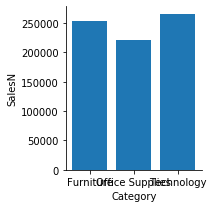

In [95]:
print(total.head())

g = sns.FacetGrid(total)

g.map(plt.bar, 'Category', 'SalesN')

# Visualization by total sales

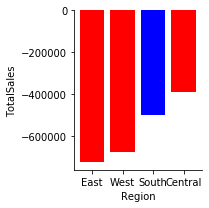

In [58]:
g = sns.FacetGrid(s.sort_values(by='TotalSales'))
g.map(plt.bar, 'Region', 'TotalSales', color=['r', 'r', 'b', 'r'])

# Visualization by name

In [119]:
list(total['SalesN'][0:3])
print(total.info())

print(total.unstack().info())
total.unstack().plot(kind='bar', stacked=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    12 non-null     object
 1   Category  12 non-null     object
 2   SalesN    12 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 704.0+ bytes
None


AttributeError: 'Series' object has no attribute 'info'

In [ ]:
# stacked bar plot
import numpy as np
import matplotlib.pyplot as plt
#Get values from the group and categories
quarter = total['Region'].unique()
a = total['SalesN'][0:3]
tshirt =
formal_shirt = [70, 90, 111, 80]
    
#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
# The position of the bars on the x-axis
r = range(len(quarter))
barWidth = 1
#plot bars
plt.figure(figsize=(10,7))
plt.bar(r, jeans, color=colors[0], edgecolor='white', width=barWidth, label="jeans")
plt.bar(r, tshirt, bottom=np.array(jeans), color=colors[1], edgecolor='white', width=barWidth, label='tshirt')
plt.bar(r, formal_shirt, bottom=np.array(jeans)+np.array(tshirt), color=colors[2], edgecolor='white', width=barWidth, label='formal shirt')
plt.legend()
# Custom X axis
plt.xticks(r, quarter, fontweight='bold')
plt.ylabel("sales")
plt.savefig("stacked1.png")
plt.show()